# Loading VLM Models in Scratch

In [1]:
# === Set cache to scratch before importing transformers ===
import os

# Set Hugging Face cache root
os.environ["HF_HOME"] = "/scratch/dbanerj/huggingface"

# Optional: These are handled under HF_HOME but can be made explicit if needed
os.environ["HUGGINGFACE_HUB_CACHE"] = os.path.join(os.environ["HF_HOME"], "hub")
os.environ["HF_DATASETS_CACHE"] = os.path.join(os.environ["HF_HOME"], "datasets")

# Confirm
print("HF_HOME:", os.getenv("HF_HOME"))

HF_HOME: /scratch/dbanerj/huggingface


In [2]:
import sys
print(sys.executable)

/home/dbanerj/envs/python310_env/bin/python


In [5]:
# BLIP-1
from transformers import BlipProcessor, BlipForConditionalGeneration
BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

BlipForConditionalGeneration(
  (vision_model): BlipVisionModel(
    (embeddings): BlipVisionEmbeddings(
      (patch_embedding): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (encoder): BlipEncoder(
      (layers): ModuleList(
        (0-11): 12 x BlipEncoderLayer(
          (self_attn): BlipAttention(
            (dropout): Dropout(p=0.0, inplace=False)
            (qkv): Linear(in_features=768, out_features=2304, bias=True)
            (projection): Linear(in_features=768, out_features=768, bias=True)
          )
          (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): BlipMLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=768, out_features=3072, bias=True)
            (fc2): Linear(in_features=3072, out_features=768, bias=True)
          )
          (layer_norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
      )
    )
    (post_layernorm): LayerNorm((768,), eps=1e-0

In [19]:
# ViT + GPT2 (CNN + Transformer hybrid baseline)
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer
VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "architectures": [
    "ViTModel"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "pooler_act": "tanh",
  "pooler_output_size": 768,
  "qkv_bias": true,
  "torch_dtype": "float32",
  "transformers_version": "4.51.0"
}

Config of the decoder: <class 'transformers.models.gpt2.modeling_gpt2.GPT2LMHeadModel'> is overwritten by shared decoder config: GPT2Config {
  "activation_function": "gelu_new",
  "add_cross_attention": true,
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "decoder_start_to

GPT2TokenizerFast(name_or_path='nlpconnect/vit-gpt2-image-captioning', vocab_size=50257, model_max_length=1024, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>', 'pad_token': '<|endoftext|>'}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	50256: AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}
)

In [7]:
# CLIP (for scoring / visual-semantic grounding reference)
from transformers import CLIPProcessor, CLIPModel
CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
CLIPModel.from_pretrained("openai/clip-vit-base-patch32")

CLIPModel(
  (text_model): CLIPTextTransformer(
    (embeddings): CLIPTextEmbeddings(
      (token_embedding): Embedding(49408, 512)
      (position_embedding): Embedding(77, 512)
    )
    (encoder): CLIPEncoder(
      (layers): ModuleList(
        (0-11): 12 x CLIPEncoderLayer(
          (self_attn): CLIPSdpaAttention(
            (k_proj): Linear(in_features=512, out_features=512, bias=True)
            (v_proj): Linear(in_features=512, out_features=512, bias=True)
            (q_proj): Linear(in_features=512, out_features=512, bias=True)
            (out_proj): Linear(in_features=512, out_features=512, bias=True)
          )
          (layer_norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (mlp): CLIPMLP(
            (activation_fn): QuickGELUActivation()
            (fc1): Linear(in_features=512, out_features=2048, bias=True)
            (fc2): Linear(in_features=2048, out_features=512, bias=True)
          )
          (layer_norm2): LayerNorm((512,), eps=1e

In [ ]:
# BLIP-2 (InstructBLIP - Vicuna 13B)
from transformers import InstructBlipProcessor, InstructBlipForConditionalGeneration
InstructBlipProcessor.from_pretrained("Salesforce/instructblip-vicuna-13b")
InstructBlipForConditionalGeneration.from_pretrained("Salesforce/instructblip-vicuna-13b")

# BLIP-2 Instruct BLIP

In [1]:
!ls /scratch/dbanerj/huggingface/hub/models--Salesforce--instructblip-vicuna-13b/snapshots

91271ed4920607b735c9925dfa495de6d012d16d


/home/dbanerj/envs/python310_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
The model weights are not tied. Please use the `tie_weights` method before using the `infer_auto_device` function.
Loading checkpoint shards: 100%|██████████| 6/6 [00:56<00:00,  9.40s/it]
Some parameters are on the meta device because they were offloaded to the cpu.


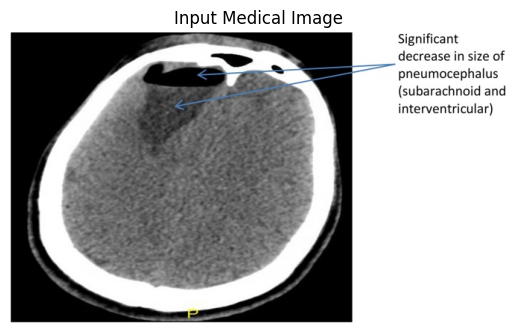

Caption: Question: Describe the clinical findings in this medical scan.
Answer: the patient has a tumor


In [2]:
from transformers import InstructBlipProcessor, InstructBlipForConditionalGeneration
import torch
from PIL import Image
import matplotlib.pyplot as plt

# === Load Model from Scratch Path ===
model_path = "/scratch/dbanerj/huggingface/hub/models--Salesforce--instructblip-vicuna-13b/snapshots/91271ed4920607b735c9925dfa495de6d012d16d"

processor = InstructBlipProcessor.from_pretrained(model_path)
model = InstructBlipForConditionalGeneration.from_pretrained(
    model_path,
    torch_dtype=torch.float16,
    device_map="auto"
)

# === Load Image ===
image_path = "roco-dataset/data/train/non-radiology/images/ROCO_81832.jpg"
image = Image.open(image_path).convert("RGB")

# === Display Image ===
plt.imshow(image)
plt.axis("off")
plt.title("Input Medical Image")
plt.show()

# === Generate Caption ===
prompt = "Question: Describe the clinical findings in this medical scan.\nAnswer:"

inputs = processor(images=image, text=prompt, return_tensors="pt").to(model.device)
outputs = model.generate(**inputs, max_new_tokens=128)

caption = processor.batch_decode(outputs, skip_special_tokens=True)[0].strip()
print("Caption:", caption)

# BLIP

In [2]:
!ls /scratch/dbanerj/huggingface/hub/models--Salesforce--blip-image-captioning-base/snapshots

82a37760796d32b1411fe092ab5d4e227313294b
c39c905a1ac68f0ee42ce3b85d8d983b16d884a7


/home/dbanerj/envs/python310_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/dbanerj/envs/python310_env/lib/python3.12/site-packages/transformers/utils/hub.py:105: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


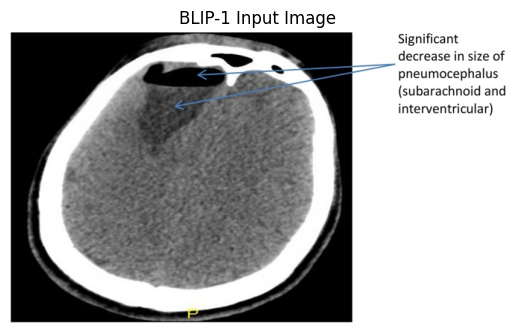

BLIP-1 Caption: a medical scan with a small, white, and black area


In [ ]:
from transformers import BlipProcessor, BlipForConditionalGeneration
import torch
from PIL import Image
import matplotlib.pyplot as plt

# === Load model from snapshot ===
model_path = "/scratch/dbanerj/huggingface/hub/models--Salesforce--blip-image-captioning-base/snapshots/82a37760796d32b1411fe092ab5d4e227313294b"

processor = BlipProcessor.from_pretrained(model_path)
model = BlipForConditionalGeneration.from_pretrained(model_path).to("cuda" if torch.cuda.is_available() else "cpu")

# === Load image ===
image_path = "roco-dataset/data/train/non-radiology/images/ROCO_81832.jpg"
image = Image.open(image_path).convert("RGB")

# === Optional: View the image ===
plt.imshow(image)
plt.axis("off")
plt.title("BLIP-1 Input Image")
plt.show()

# === Generate Caption ===
text_prompt = "a medical scan"  # you can also set this to None
inputs = processor(image, text_prompt, return_tensors="pt").to(model.device)

out = model.generate(**inputs)
caption = processor.decode(out[0], skip_special_tokens=True)
print("BLIP-1 Caption:", caption)

# ViT + GPT2 (CNN + Transformer hybrid baseline)/ CLIPCLAP

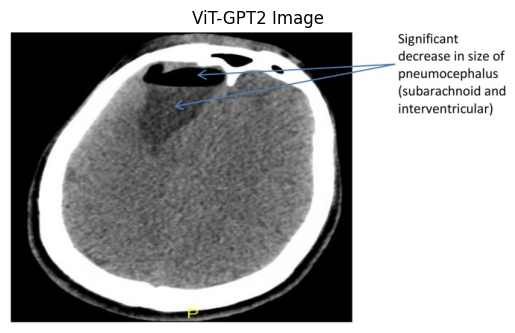

ViT-GPT2 Caption: a white bird sitting on top of a white surface 


In [6]:
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer
import torch
from PIL import Image
import matplotlib.pyplot as plt
import os

# Model ID - cached in scratch already
model_id = "nlpconnect/vit-gpt2-image-captioning"

# Load model from Hugging Face using local cache
model = VisionEncoderDecoderModel.from_pretrained(model_id, local_files_only=True).to("cuda" if torch.cuda.is_available() else "cpu")
feature_extractor = ViTImageProcessor.from_pretrained(model_id, local_files_only=True)
tokenizer = AutoTokenizer.from_pretrained(model_id, local_files_only=True)

image_path = "roco-dataset/data/train/non-radiology/images/ROCO_81832.jpg"
image = Image.open(image_path).convert("RGB")

plt.imshow(image)
plt.axis("off")
plt.title("ViT-GPT2 Image")
plt.show()

pixel_values = feature_extractor(images=image, return_tensors="pt").pixel_values.to(model.device)
output_ids = model.generate(pixel_values, max_length=128, num_beams=4)
caption = tokenizer.decode(output_ids[0], skip_special_tokens=True)

print("ViT-GPT2 Caption:", caption)

# CLIP

In [3]:
!ls /scratch/dbanerj/huggingface/hub/models--openai--clip-vit-base-patch32/snapshots

3d74acf9a28c67741b2f4f2ea7635f0aaf6f0268
aa8b329a670ccfc2a5170d7391ac3fca2e88595f


In [5]:
from transformers import CLIPProcessor, CLIPModel
import torch
from PIL import Image
import os

os.environ["TRANSFORMERS_OFFLINE"] = "1"
os.environ["TOKENIZERS_PARALLELISM"] = "false"

clip_path = "/scratch/dbanerj/huggingface/hub/models--openai--clip-vit-base-patch32/snapshots/3d74acf9a28c67741b2f4f2ea7635f0aaf6f0268"

model = CLIPModel.from_pretrained(clip_path).to("cuda" if torch.cuda.is_available() else "cpu")
processor = CLIPProcessor.from_pretrained(clip_path)

# === Load image and sample caption ===
image_path = "roco-dataset/data/train/non-radiology/images/ROCO_81832.jpg"
image = Image.open(image_path).convert("RGB")

caption = "An MRI scan showing a sagittal view of the brain"

# === Encode & Score ===
inputs = processor(text=[caption], images=image, return_tensors="pt", padding=True).to(model.device)
outputs = model(**inputs)

# cosine similarity between image and text
image_embeds = outputs.image_embeds
text_embeds = outputs.text_embeds

similarity = torch.nn.functional.cosine_similarity(image_embeds, text_embeds)
print(f"CLIP Similarity Score: {similarity.item():.4f}")

CLIP Similarity Score: 0.2596


# BLIP Baseline Evaluation

In [3]:
import os
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True  # Allows PIL to load broken images

# --- Load ground truth captions from .txt file ---
def load_roco_captions(txt_path):
    gt = {}
    with open(txt_path, 'r', encoding='utf-8') as f:
        for line in f:
            parts = line.strip().split('\t')
            if len(parts) == 2:
                image_id, caption = parts
                if caption.strip():  # Ensure caption isn't empty
                    gt[image_id + ".jpg"] = caption.strip()
    return gt

# Paths
image_dir = "roco-dataset/data/test/radiology/images"
captions_txt_path = "roco-dataset/data/test/radiology/captions.txt"

# Load captions
gt_captions = load_roco_captions(captions_txt_path)
image_list = [
    fname for fname in gt_captions.keys()
    if os.path.exists(os.path.join(image_dir, fname))
]

In [4]:
from transformers import BlipProcessor, BlipForConditionalGeneration
import torch
from tqdm import tqdm
import json

# Load BLIP model
model_path = "/scratch/dbanerj/huggingface/hub/models--Salesforce--blip-image-captioning-base/snapshots/82a37760796d32b1411fe092ab5d4e227313294b"
processor = BlipProcessor.from_pretrained(model_path)
model = BlipForConditionalGeneration.from_pretrained(model_path).to("cuda" if torch.cuda.is_available() else "cpu")

# Store generated and reference captions
generated = {}
references = {}

# Generate captions
for fname in tqdm(image_list):
    try:
        img_path = os.path.join(image_dir, fname)
        image = Image.open(img_path).convert("RGB")

        inputs = processor(image, "a medical scan", return_tensors="pt").to(model.device)
        output = model.generate(**inputs)
        caption = processor.decode(output[0], skip_special_tokens=True)

        generated[fname] = [caption]
        references[fname] = [gt_captions[fname]]

    except Exception as e:
        print(f"Error processing {fname}: {e}")
        

# Save dictionaries to JSON files
with open("generated_captions.json", "w") as gen_f:
    json.dump(generated, gen_f)

with open("reference_captions.json", "w") as ref_f:
    json.dump(references, ref_f)

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
100%|██████████| 8176/8176 [16:06<00:00,  8.46it/s]


In [4]:
import json
with open("generated_captions.json", "r") as gen_f:
    generated = json.load(gen_f)

with open("reference_captions.json", "r") as ref_f:
    references = json.load(ref_f)

In [5]:
import torch
from transformers import AutoTokenizer, AutoModel
from sklearn.metrics.pairwise import cosine_similarity
from numpy import ndarray
from tqdm import tqdm
from bert_score import score

# === Bio_ClinicalBERT setup ===
model_name = "emilyalsentzer/Bio_ClinicalBERT"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name).to("cuda" if torch.cuda.is_available() else "cpu")
model.eval()

# === Sentence embedding function (mean-pooled) ===
def get_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512).to(model.device)
    with torch.no_grad():
        outputs = model(**inputs)
    last_hidden = outputs.last_hidden_state
    mask = inputs['attention_mask'].unsqueeze(-1).expand(last_hidden.size()).float()
    masked = last_hidden * mask
    summed = masked.sum(1)
    counts = mask.sum(1)
    mean_pooled = summed / counts
    return mean_pooled.squeeze().cpu().numpy()

# Flatten generated and reference captions to lists
preds = [generated[k][0] for k in image_list]
refs = [references[k][0] for k in image_list]

# === Cosine similarity using Bio_ClinicalBERT mean-pooling ===
similarities = []
for pred, ref in tqdm(zip(preds, refs), total=len(preds), desc="Bio_ClinicalBERT Cosine"):
    try:
        emb_pred = get_embedding(pred)
        emb_ref = get_embedding(ref)
        if isinstance(emb_pred, ndarray) and isinstance(emb_ref, ndarray) and emb_pred.shape == emb_ref.shape:
            sim = cosine_similarity([emb_pred], [emb_ref])[0][0]
        else:
            sim = 0.0
        similarities.append(sim)
    except Exception as e:
        print(f"Error comparing: {e}")
        similarities.append(0.0)

bio_clinical_cosine = sum(similarities) / len(similarities)

# === Official BERTScore with Bio_ClinicalBERT model ===
def truncate_to_512(texts, tokenizer):
    truncated = []
    for t in texts:
        tokens = tokenizer.tokenize(t)
        tokens = tokens[:510]  # Leave room for [CLS] and [SEP]
        truncated_text = tokenizer.convert_tokens_to_string(tokens)
        truncated.append(truncated_text)
    return truncated

# Apply truncation
preds_trunc = truncate_to_512(preds, tokenizer)
refs_trunc = truncate_to_512(refs, tokenizer)

# Then pass to BERTScore
P_BERTScore_Bio_ClinicalBERT, R_BERTScore_Bio_ClinicalBERT, F1_BERTScore_Bio_ClinicalBERT = score(
    preds_trunc, refs_trunc,
    model_type=model_name,
    num_layers=12,
    lang="en",
    device="cuda" if torch.cuda.is_available() else "cpu"
)

# === Official BERTScore using BERT-base ===
P_Original_BERT, R_Original_BERT, F1_Original_BERT = score(
    preds, refs,
    model_type="bert-base-uncased",
    lang="en",
    device="cuda" if torch.cuda.is_available() else "cpu"
)

# === Print all scores ===
print(f"\n--- Evaluation Summary ---")
print(f"Bio_ClinicalBERT Cosine Similarity (Mean Pooled): {bio_clinical_cosine:.4f}")
print(f"BERTScore with Bio_ClinicalBERT:\n"
      f"\tPrecision: {P_BERTScore_Bio_ClinicalBERT.mean():.4f}\n"
      f"\tRecall:    {R_BERTScore_Bio_ClinicalBERT.mean():.4f}\n"
      f"\tF1-Score:  {F1_BERTScore_Bio_ClinicalBERT.mean():.4f}")
print(f"Original BERTScore:\n"
      f"\tPrecision: {P_Original_BERT.mean():.4f}\n"
      f"\tRecall:    {R_Original_BERT.mean():.4f}\n"
      f"\tF1-Score:  {F1_Original_BERT.mean():.4f}")

/home/dbanerj/envs/python310_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Bio_ClinicalBERT Cosine: 100%|██████████| 8176/8176 [01:27<00:00, 93.97it/s]



--- Evaluation Summary ---
Bio_ClinicalBERT Cosine Similarity (Mean Pooled): 0.8498
BERTScore with Bio_ClinicalBERT:
	Precision: 0.7438
	Recall:    0.6764
	F1-Score:  0.7078
Original BERTScore:
	Precision: 0.5054
	Recall:    0.4122
	F1-Score:  0.4518


In [5]:
import os
import sys
import json
import torch
import logging
import warnings
import tempfile
import contextlib
from tqdm import tqdm
from numpy import ndarray
from sklearn.metrics.pairwise import cosine_similarity
from transformers import AutoTokenizer, AutoModel
from bert_score import score
# === COCOEvalCap (CIDEr & SPICE only) ===
from pycocoevalcap.eval import COCOEvalCap
from pycocoevalcap.tokenizer.ptbtokenizer import PTBTokenizer
from pycocotools.coco import COCO
import io

# Suppress warnings & transformers logs
os.environ["TRANSFORMERS_NO_ADVISORY_WARNINGS"] = "true"
os.environ["TOKENIZERS_PARALLELISM"] = "false"
warnings.filterwarnings("ignore")
logging.getLogger("transformers").setLevel(logging.ERROR)

# === Bio_ClinicalBERT Setup ===
model_name = "emilyalsentzer/Bio_ClinicalBERT"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name).to("cuda" if torch.cuda.is_available() else "cpu")
model.eval()

# === Sentence Embedding Function (mean-pooled) ===
def get_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512).to(model.device)
    with torch.no_grad():
        outputs = model(**inputs)
    last_hidden = outputs.last_hidden_state
    mask = inputs['attention_mask'].unsqueeze(-1).expand(last_hidden.size()).float()
    masked = last_hidden * mask
    summed = masked.sum(1)
    counts = mask.sum(1)
    mean_pooled = summed / counts
    return mean_pooled.squeeze().cpu().numpy()

# === Inputs: preds, refs ===
# Replace with your actual values
preds = [generated[k][0] for k in image_list]
refs = [references[k][0] for k in image_list]

# === Cosine Similarity (Mean-Pooled Bio_ClinicalBERT) ===
similarities = []
for pred, ref in tqdm(zip(preds, refs), total=len(preds), desc="Bio_ClinicalBERT Cosine"):
    try:
        emb_pred = get_embedding(pred)
        emb_ref = get_embedding(ref)
        if isinstance(emb_pred, ndarray) and isinstance(emb_ref, ndarray) and emb_pred.shape == emb_ref.shape:
            sim = cosine_similarity([emb_pred], [emb_ref])[0][0]
        else:
            sim = 0.0
    except:
        sim = 0.0
    similarities.append(sim)
bio_clinical_cosine = sum(similarities) / len(similarities)

# === BERTScore (Bio_ClinicalBERT & Original) ===
def truncate_to_512(texts, tokenizer):
    return [tokenizer.convert_tokens_to_string(tokenizer.tokenize(t)[:510]) for t in texts]

preds_trunc = truncate_to_512(preds, tokenizer)
refs_trunc = truncate_to_512(refs, tokenizer)

P_Bio, R_Bio, F1_Bio = score(
    preds_trunc, refs_trunc,
    model_type=model_name,
    num_layers=12,
    lang="en",
    device="cuda" if torch.cuda.is_available() else "cpu",
    verbose=False
)

P_BERT, R_BERT, F1_BERT = score(
    preds, refs,
    model_type="bert-base-uncased",
    lang="en",
    device="cuda" if torch.cuda.is_available() else "cpu",
    verbose=False
)

pred_dict = {str(i): [pred] for i, pred in enumerate(preds)}
ref_dict  = {str(i): [ref] for i, ref in enumerate(refs)}

def prepare_coco_format(pred_dict, ref_dict):
    ann = {'annotations': [], 'images': [], 'type': 'captions', 'info': {}, 'licenses': []}
    for image_id in ref_dict:
        ann['images'].append({'id': image_id})
        for idx, caption in enumerate(ref_dict[image_id]):
            ann['annotations'].append({
                'image_id': image_id,
                'id': int(f"{image_id}{idx}"),
                'caption': caption
            })
    return ann, [{'image_id': k, 'caption': v[0]} for k, v in pred_dict.items()]

ann_file, res_file = tempfile.NamedTemporaryFile(delete=False), tempfile.NamedTemporaryFile(delete=False)
with open(ann_file.name, 'w') as f:
    json.dump(prepare_coco_format(pred_dict, ref_dict)[0], f)
with open(res_file.name, 'w') as f:
    json.dump(prepare_coco_format(pred_dict, ref_dict)[1], f)

with contextlib.redirect_stdout(io.StringIO()), contextlib.redirect_stderr(io.StringIO()):
    coco = COCO(ann_file.name)
    cocoRes = coco.loadRes(res_file.name)
    
tokenizer = PTBTokenizer()
coco.evalImgs = []
cocoEval = COCOEvalCap(coco, cocoRes)
cocoEval.params['eval'] = ['CIDEr', 'SPICE']

# === Suppress COCOEvalCap stdout/stderr ===
@contextlib.contextmanager
def suppress_stdout_stderr():
    with open(os.devnull, 'w') as devnull:
        old_stdout, old_stderr = sys.stdout, sys.stderr
        sys.stdout = devnull
        sys.stderr = devnull
        try:
            yield
        finally:
            sys.stdout = old_stdout
            sys.stderr = old_stderr

with suppress_stdout_stderr():
    cocoEval.evaluate()

# === Final Clean Output ===
print(f"\n--- Evaluation Summary for Fine-Tuned BERT Model ---")
print(f"Bio_ClinicalBERT Cosine Similarity (Mean Pooled): {bio_clinical_cosine:.4f}")
print(f"BERTScore with Bio_ClinicalBERT:\n"
      f"\tPrecision: {P_Bio.mean():.4f}\n"
      f"\tRecall:    {R_Bio.mean():.4f}\n"
      f"\tF1-Score:  {F1_Bio.mean():.4f}")
print(f"Original BERTScore:\n"
      f"\tPrecision: {P_BERT.mean():.4f}\n"
      f"\tRecall:    {R_BERT.mean():.4f}\n"
      f"\tF1-Score:  {F1_BERT.mean():.4f}")
print(f"CIDEr: {cocoEval.eval['CIDEr']:.4f}")
print(f"SPICE: {cocoEval.eval['SPICE']:.4f}")

# === Cleanup
os.unlink(ann_file.name)
os.unlink(res_file.name)

/home/dbanerj/envs/python310_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Bio_ClinicalBERT Cosine: 100%|██████████| 8176/8176 [01:28<00:00, 91.96it/s]
Apr 30, 2025 11:17:33 PM edu.stanford.nlp.process.PTBLexer next
PTBTokenizer tokenized 200345 tokens at 1290122.41 tokens per second.
PTBTokenizer tokenized 91751 tokens at 944652.08 tokens per second.



--- Evaluation Summary for Fine-Tuned BERT Model ---
Bio_ClinicalBERT Cosine Similarity (Mean Pooled): 0.8498
BERTScore with Bio_ClinicalBERT:
	Precision: 0.7438
	Recall:    0.6764
	F1-Score:  0.7078
Original BERTScore:
	Precision: 0.5054
	Recall:    0.4122
	F1-Score:  0.4518
CIDEr: 0.0294
SPICE: 0.0171


# Fine-Tuning Model on ROCO

In [8]:
!pip install transformers datasets timm evaluate accelerate bitsandbytes

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 75.0 MB/s eta 0:00:00:00:0100:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip


### Pre-Processing Model

In [3]:
import os
import pandas as pd
from datasets import Dataset
import re

data = []
with open("roco-dataset/data/train/radiology/captions.txt", "r", encoding="utf-8") as f:
    for line in f:
        line = line.strip()
        match = re.match(r"^(ROCO_\d+)[\s\u2192]*\s+(.*)$", line)  # handles arrow and whitespace
        if match:
            image_id, caption = match.groups()
            data.append({"image_id": image_id + ".jpg", "caption": caption})

df = pd.DataFrame(data)

# Optional: filter to images that exist
image_dir = "roco-dataset/data/train/radiology/images"
available_images = set(os.listdir(image_dir))
df = df[df["image_id"].isin(available_images)]

# Reset index
df = df.reset_index(drop=True)
print(df.head())

# Convert to HuggingFace dataset
dataset = Dataset.from_pandas(df)

/home/dbanerj/envs/python310_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


         image_id                                            caption
0  ROCO_00002.jpg  Computed tomography scan in axial view showing...
1  ROCO_00003.jpg  Bacterial contamination occurred after complet...
2  ROCO_00004.jpg  The patient had residual paralysis of the hand...
3  ROCO_00005.jpg      Panoramic radiograph after immediate loading.
4  ROCO_00007.jpg  Plain abdomen x-ray: Multiple air levels at th...


In [4]:
from PIL import Image, ImageFile
from transformers import BlipProcessor
from datasets import Dataset, concatenate_datasets
import os
import torch

# Allow PIL to load truncated images silently
ImageFile.LOAD_TRUNCATED_IMAGES = True

# === Config ===
image_dir = "roco-dataset/data/train/radiology/images"
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
batch_size = 32
chunk_size = 9500
output_dir = "processed_roco_chunks"
os.makedirs(output_dir, exist_ok=True)

# === Preprocessing Function ===
def preprocess_batch(batch):
    images, captions = [], []

    for image_id, caption in zip(batch["image_id"], batch["caption"]):
        try:
            image_path = os.path.join(image_dir, image_id)
            image = Image.open(image_path).convert("RGB")
            images.append(image)
            captions.append(caption)
        except:
            continue  # silently skip corrupted

    if not images:
        return {"input_ids": [], "attention_mask": [], "pixel_values": []}

    inputs = processor(
        images=images,
        text=captions,
        padding="max_length",
        max_length=128,
        truncation=True,
        return_tensors="pt"
    )

    return {
        "input_ids": list(inputs["input_ids"]),
        "attention_mask": list(inputs["attention_mask"]),
        "pixel_values": list(inputs["pixel_values"])
    }

# === Streaming + Chunking with Resume ===
partial_datasets = []
total = len(dataset)
for i in range(0, total, chunk_size):
    chunk_idx = i // chunk_size
    save_path = os.path.join(output_dir, f"chunk_{chunk_idx}")

    if os.path.exists(save_path):
        print(f"Chunk {chunk_idx} already processed. Skipping...")
        partial_datasets.append(save_path)
        continue

    print(f"\n>>> Processing chunk {i} to {i + chunk_size}...")
    chunk = dataset.select(range(i, min(i + chunk_size, total)))

    processed = chunk.map(
        preprocess_batch,
        batched=True,
        batch_size=batch_size,
        remove_columns=chunk.column_names,
        desc=f"Processing {i}-{i+chunk_size}"
    )

    processed.save_to_disk(save_path)
    partial_datasets.append(save_path)

# === Final: Merge All Chunks
final_dataset = concatenate_datasets([Dataset.load_from_disk(p) for p in partial_datasets])
print(f"\nFinal dataset size: {len(final_dataset)}")

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


Chunk 0 already processed. Skipping...
Chunk 1 already processed. Skipping...
Chunk 2 already processed. Skipping...
Chunk 3 already processed. Skipping...
Chunk 4 already processed. Skipping...
Chunk 5 already processed. Skipping...

>>> Processing chunk 57000 to 66500...


Saving the dataset (30/30 shards): 100%|██████████| 8419/8419 [00:28<00:00, 296.58 examples/s]



Final dataset size: 65419


In [7]:
from datasets import Dataset, concatenate_datasets, load_from_disk
import os

# Path where all chunks are saved
output_dir = "processed_roco_chunks"

# Get all chunk paths (sorted to maintain order)
chunk_paths = sorted([
    os.path.join(output_dir, d)
    for d in os.listdir(output_dir)
    if os.path.isdir(os.path.join(output_dir, d)) and d.startswith("chunk_")
])

# Load and concatenate all chunks
final_dataset = concatenate_datasets([load_from_disk(path) for path in chunk_paths])
print(f"Final dataset size: {len(final_dataset)}")
final_dataset.save_to_disk("processed_roco_final")

Final dataset size: 65419


Saving the dataset (233/233 shards): 100%|██████████| 65419/65419 [12:45<00:00, 85.46 examples/s] 


### Training Fine-Tuned Model

In [9]:
from datasets import load_from_disk
from torch.utils.data import DataLoader
from transformers import default_data_collator

# === Config ===
DATA_PATH = "processed_roco_final"
BATCH_SIZE = 8  # Tune as per your GPU

# === Load preprocessed HuggingFace Dataset ===
dataset = load_from_disk(DATA_PATH)

# === Create DataLoader with proper collate_fn ===
train_dataloader = DataLoader(
    dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    collate_fn=default_data_collator  # FIX: Ensures batch is a dictionary
)

print(f"Dataloader initialized with {len(train_dataloader)} batches.")
print(dataset[0].keys())  # Should show: input_ids, attention_mask, pixel_values

Dataloader initialized with 8178 batches.
dict_keys(['input_ids', 'attention_mask', 'pixel_values'])


In [16]:
import torch
from torch.optim import AdamW
from torch.nn.utils import clip_grad_norm_
from torch.amp import autocast, GradScaler  # Use torch.amp instead of torch.cuda.amp
from transformers import BlipForConditionalGeneration, get_scheduler
from tqdm import tqdm
from torch.utils.data import DataLoader
from datasets import load_from_disk
from transformers import default_data_collator

# === Config ===
DATA_PATH = "processed_roco_final"
BATCH_SIZE = 8
GRAD_ACCUM = 4
EPOCHS = 1  # Start with 1 for stability, increase later if needed
LEARNING_RATE = 5e-5
MODEL_SAVE_PATH = "blip-finetuned-roco"

# === Load dataset ===
dataset = load_from_disk(DATA_PATH)
train_dataloader = DataLoader(
    dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=True, 
    collate_fn=default_data_collator
)

# === Model, Device, Optimizer, Scheduler ===
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

optimizer = AdamW(model.parameters(), lr=LEARNING_RATE)
num_training_steps = len(train_dataloader) * EPOCHS // GRAD_ACCUM
lr_scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)

scaler = GradScaler()  # Updated for deprecation fix

# === Training Loop ===
model.train()
for epoch in range(EPOCHS):
    print(f"\n--- Epoch {epoch + 1}/{EPOCHS} ---")
    progress_bar = tqdm(enumerate(train_dataloader), total=len(train_dataloader))

    for step, batch in progress_bar:
        try:
            batch = {k: v.to(device) for k, v in batch.items()}

            with autocast(device_type="cuda"):  # Updated for deprecation fix
                outputs = model(
                    input_ids=batch["input_ids"],
                    attention_mask=batch["attention_mask"],
                    pixel_values=batch["pixel_values"],
                    labels=batch["input_ids"]
                )
                loss = outputs.loss / GRAD_ACCUM

            scaler.scale(loss).backward()

            if (step + 1) % GRAD_ACCUM == 0 or (step + 1) == len(train_dataloader):
                clip_grad_norm_(model.parameters(), max_norm=1.0)
                scaler.step(optimizer)
                scaler.update()
                optimizer.zero_grad()
                lr_scheduler.step()

            progress_bar.set_description(f"Epoch {epoch+1}")
            progress_bar.set_postfix(loss=round(loss.item() * GRAD_ACCUM, 4))

        except RuntimeError as e:
            if "CUDA out of memory" in str(e):
                print("Skipping batch due to OOM")
                optimizer.zero_grad(set_to_none=True)
                torch.cuda.empty_cache()
            else:
                raise e

# === Save Fine-tuned Model ===
model.save_pretrained(MODEL_SAVE_PATH)
print(f"\nModel saved to: {MODEL_SAVE_PATH}")


--- Epoch 1/1 ---


Epoch 1:  60%|█████▉    | 4901/8178 [2:36:20<1:45:22,  1.93s/it, loss=0.854]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

Epoch 1: 100%|██████████| 8178/8178 [4:21:06<00:00,  1.92s/it, loss=0.355]



Model saved to: blip-finetuned-roco


In [5]:
from transformers import BlipProcessor

# Load original processor
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")

# Save to same folder where model is saved
processor.save_pretrained("blip-finetuned-roco")

[]

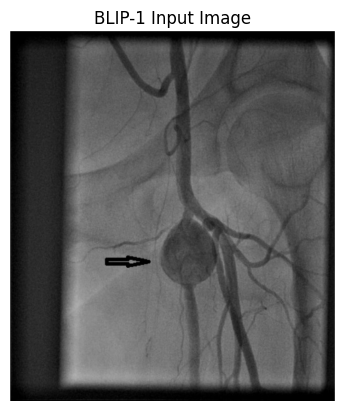

Generated Caption before Fine-Tuneing BLIP-1 Model (baseline model): a medical scan with a small black arrow pointing towards the left side of the brain
Generated Caption after Fine-Tuneing BLIP-1 Model: angiogram showing the right coronary artery ( arrow ).


In [21]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import torch
import matplotlib.pyplot as plt
# import os

# Load model and processor
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
baseline_blip_model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base").to("cuda" if torch.cuda.is_available() else "cpu")
fine_tuned_model = BlipForConditionalGeneration.from_pretrained("blip-finetuned-roco").to("cuda" if torch.cuda.is_available() else "cpu")

# === Load image ===
image = Image.open("roco-dataset/data/test/radiology/images/ROCO_00218.jpg").convert("RGB")

# === Optional: View the image ===
plt.imshow(image)
plt.axis("off")
plt.title("BLIP-1 Input Image")
plt.show()

# Generate Baseline Caption
text_prompt = "a medical scan"  # you can also set this to None
inputs = processor(image, text_prompt, return_tensors="pt").to(baseline_blip_model.device)
out_baseline = baseline_blip_model.generate(**inputs)
caption_baseline = processor.decode(out_baseline[0], skip_special_tokens=True)
print("Generated Caption before Fine-Tuneing BLIP-1 Model (baseline model):", caption_baseline)

# Preprocess and Generate Fine-Tuned Caption
fine_tuned_model.eval()
inputs = processor(images=image, return_tensors="pt").to(fine_tuned_model.device)
out_fine_tuned = fine_tuned_model.generate(**inputs)
caption_fine_tuned = processor.decode(out_fine_tuned[0], skip_special_tokens=True)
print("Generated Caption after Fine-Tuneing BLIP-1 Model:", caption_fine_tuned)

# BLIP Fine-Tuned Evaluation

In [3]:
import os
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True  # Allows PIL to load broken images

# --- Load ground truth captions from .txt file ---
def load_roco_captions(txt_path):
    gt = {}
    with open(txt_path, 'r', encoding='utf-8') as f:
        for line in f:
            parts = line.strip().split('\t')
            if len(parts) == 2:
                image_id, caption = parts
                if caption.strip():  # Ensure caption isn't empty
                    gt[image_id + ".jpg"] = caption.strip()
    return gt

# Paths
image_dir = "roco-dataset/data/test/radiology/images"
captions_txt_path = "roco-dataset/data/test/radiology/captions.txt"

# Load captions
gt_captions = load_roco_captions(captions_txt_path)
image_list = [
    fname for fname in gt_captions.keys()
    if os.path.exists(os.path.join(image_dir, fname))
]

In [4]:
import os
import json
from PIL import Image, ImageFile
from tqdm import tqdm
import torch
from transformers import BlipProcessor, BlipForConditionalGeneration

ImageFile.LOAD_TRUNCATED_IMAGES = True

# === Paths ===
model_path = "blip-finetuned-roco"
image_dir = "roco-dataset/data/test/radiology/images"
captions_txt_path = "roco-dataset/data/test/radiology/captions.txt"

# === Load processor and model ===
processor = BlipProcessor.from_pretrained(model_path)
model = BlipForConditionalGeneration.from_pretrained(model_path).to("cuda" if torch.cuda.is_available() else "cpu")
model.eval()

# === Load test image-caption pairs ===
def load_roco_captions(txt_path):
    gt = {}
    with open(txt_path, 'r', encoding='utf-8') as f:
        for line in f:
            parts = line.strip().split('\t')
            if len(parts) == 2:
                image_id, caption = parts
                if caption.strip():
                    gt[image_id + ".jpg"] = caption.strip()
    return gt

gt_captions = load_roco_captions(captions_txt_path)
image_list = [
    fname for fname in gt_captions.keys()
    if os.path.exists(os.path.join(image_dir, fname))
]

# === Generate captions ===
generated = {}
for fname in tqdm(image_list, desc="Generating captions"):
    try:
        image = Image.open(os.path.join(image_dir, fname)).convert("RGB")
        inputs = processor(image, "a medical scan", return_tensors="pt").to(model.device)
        output = model.generate(**inputs)
        caption = processor.decode(output[0], skip_special_tokens=True)
        generated[fname] = [caption]
    except Exception as e:
        print(f"Skipping {fname}: {e}")

# === Save output ===
with open("generated_finetuned_captions.json", "w") as f:
    json.dump(generated, f)

print("Captions generated and saved to generated_finetuned_captions.json")

/home/dbanerj/envs/python310_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Generating captions: 100%|██████████| 8176/8176 [28:48<00:00,  4.73it/s]


Captions generated and saved to generated_finetuned_captions.json


In [4]:
import json

with open("generated_finetuned_captions.json", "r") as gen_f:
    generated_finetuned = json.load(gen_f)

with open("reference_captions.json", "r") as ref_f:
    references = json.load(ref_f)

In [6]:
import os
import sys
import json
import torch
import logging
import warnings
import tempfile
import contextlib
from tqdm import tqdm
from numpy import ndarray
from sklearn.metrics.pairwise import cosine_similarity
from transformers import AutoTokenizer, AutoModel
from bert_score import score
# === COCOEvalCap (CIDEr & SPICE only) ===
from pycocoevalcap.eval import COCOEvalCap
from pycocoevalcap.tokenizer.ptbtokenizer import PTBTokenizer
from pycocotools.coco import COCO
import io

# Suppress warnings & transformers logs
os.environ["TRANSFORMERS_NO_ADVISORY_WARNINGS"] = "true"
os.environ["TOKENIZERS_PARALLELISM"] = "false"
warnings.filterwarnings("ignore")
logging.getLogger("transformers").setLevel(logging.ERROR)

# === Bio_ClinicalBERT Setup ===
model_name = "emilyalsentzer/Bio_ClinicalBERT"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name).to("cuda" if torch.cuda.is_available() else "cpu")
model.eval()

# === Sentence Embedding Function (mean-pooled) ===
def get_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512).to(model.device)
    with torch.no_grad():
        outputs = model(**inputs)
    last_hidden = outputs.last_hidden_state
    mask = inputs['attention_mask'].unsqueeze(-1).expand(last_hidden.size()).float()
    masked = last_hidden * mask
    summed = masked.sum(1)
    counts = mask.sum(1)
    mean_pooled = summed / counts
    return mean_pooled.squeeze().cpu().numpy()

# === Inputs: preds, refs ===
# Replace with your actual values
preds = [generated_finetuned[k][0] for k in image_list]
refs = [references[k][0] for k in image_list]

# === Cosine Similarity (Mean-Pooled Bio_ClinicalBERT) ===
similarities = []
for pred, ref in tqdm(zip(preds, refs), total=len(preds), desc="Bio_ClinicalBERT Cosine"):
    try:
        emb_pred = get_embedding(pred)
        emb_ref = get_embedding(ref)
        if isinstance(emb_pred, ndarray) and isinstance(emb_ref, ndarray) and emb_pred.shape == emb_ref.shape:
            sim = cosine_similarity([emb_pred], [emb_ref])[0][0]
        else:
            sim = 0.0
    except:
        sim = 0.0
    similarities.append(sim)
bio_clinical_cosine = sum(similarities) / len(similarities)

# === BERTScore (Bio_ClinicalBERT & Original) ===
def truncate_to_512(texts, tokenizer):
    return [tokenizer.convert_tokens_to_string(tokenizer.tokenize(t)[:510]) for t in texts]

preds_trunc = truncate_to_512(preds, tokenizer)
refs_trunc = truncate_to_512(refs, tokenizer)

P_Bio, R_Bio, F1_Bio = score(
    preds_trunc, refs_trunc,
    model_type=model_name,
    num_layers=12,
    lang="en",
    device="cuda" if torch.cuda.is_available() else "cpu",
    verbose=False
)

P_BERT, R_BERT, F1_BERT = score(
    preds, refs,
    model_type="bert-base-uncased",
    lang="en",
    device="cuda" if torch.cuda.is_available() else "cpu",
    verbose=False
)

pred_dict = {str(i): [pred] for i, pred in enumerate(preds)}
ref_dict  = {str(i): [ref] for i, ref in enumerate(refs)}

def prepare_coco_format(pred_dict, ref_dict):
    ann = {'annotations': [], 'images': [], 'type': 'captions', 'info': {}, 'licenses': []}
    for image_id in ref_dict:
        ann['images'].append({'id': image_id})
        for idx, caption in enumerate(ref_dict[image_id]):
            ann['annotations'].append({
                'image_id': image_id,
                'id': int(f"{image_id}{idx}"),
                'caption': caption
            })
    return ann, [{'image_id': k, 'caption': v[0]} for k, v in pred_dict.items()]

ann_file, res_file = tempfile.NamedTemporaryFile(delete=False), tempfile.NamedTemporaryFile(delete=False)
with open(ann_file.name, 'w') as f:
    json.dump(prepare_coco_format(pred_dict, ref_dict)[0], f)
with open(res_file.name, 'w') as f:
    json.dump(prepare_coco_format(pred_dict, ref_dict)[1], f)

with contextlib.redirect_stdout(io.StringIO()), contextlib.redirect_stderr(io.StringIO()):
    coco = COCO(ann_file.name)
    cocoRes = coco.loadRes(res_file.name)
    
tokenizer = PTBTokenizer()
coco.evalImgs = []
cocoEval = COCOEvalCap(coco, cocoRes)
cocoEval.params['eval'] = ['CIDEr', 'SPICE']

# === Suppress COCOEvalCap stdout/stderr ===
@contextlib.contextmanager
def suppress_stdout_stderr():
    with open(os.devnull, 'w') as devnull:
        old_stdout, old_stderr = sys.stdout, sys.stderr
        sys.stdout = devnull
        sys.stderr = devnull
        try:
            yield
        finally:
            sys.stdout = old_stdout
            sys.stderr = old_stderr

with suppress_stdout_stderr():
    cocoEval.evaluate()

# === Final Clean Output ===
print(f"\n--- Evaluation Summary for Fine-Tuned BERT Model ---")
print(f"Bio_ClinicalBERT Cosine Similarity (Mean Pooled): {bio_clinical_cosine:.4f}")
print(f"BERTScore with Bio_ClinicalBERT:\n"
      f"\tPrecision: {P_Bio.mean():.4f}\n"
      f"\tRecall:    {R_Bio.mean():.4f}\n"
      f"\tF1-Score:  {F1_Bio.mean():.4f}")
print(f"Original BERTScore:\n"
      f"\tPrecision: {P_BERT.mean():.4f}\n"
      f"\tRecall:    {R_BERT.mean():.4f}\n"
      f"\tF1-Score:  {F1_BERT.mean():.4f}")
print(f"CIDEr: {cocoEval.eval['CIDEr']:.4f}")
print(f"SPICE: {cocoEval.eval['SPICE']:.4f}")

# === Cleanup
os.unlink(ann_file.name)
os.unlink(res_file.name)

Bio_ClinicalBERT Cosine: 100%|██████████| 8176/8176 [01:29<00:00, 91.28it/s]
Apr 30, 2025 10:01:56 PM edu.stanford.nlp.process.PTBLexer next
PTBTokenizer tokenized 200345 tokens at 830629.97 tokens per second.
PTBTokenizer tokenized 150259 tokens at 977351.82 tokens per second.



--- Evaluation Summary for Fine-Tuned BERT Model ---
Bio_ClinicalBERT Cosine Similarity (Mean Pooled): 0.8897
BERTScore with Bio_ClinicalBERT:
	Precision: 0.7364
	Recall:    0.7075
	F1-Score:  0.7209
Original BERTScore:
	Precision: 0.5382
	Recall:    0.4914
	F1-Score:  0.5113
CIDEr: 0.0784
SPICE: 0.0345
